EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Execution time: 301.007 seconds.
Top-710,Sketch:79*64
Top_dict with 107544 bytes.
Sketch with 20352 bytes.
Sk_head with 21672 bytes.
hyperloglog with 4816 bytes.
Total size 150.765625 kbytes, 

For copy:
Execution time: 301.007 seconds.
Top-710,Sketch:79*64
Top_dict with 107544 bytes.
Sketch with 20352 bytes.
Sk_head with 21672 bytes.
hyperloglog with 4816 bytes.
Total size 150.765625 kbytes, 
Find 0.828 of Heavy Hitters
Find:588
Top_ARE: 0.0340
Top_AAE: 277.9575
Estimate time:  0.507 seconds.


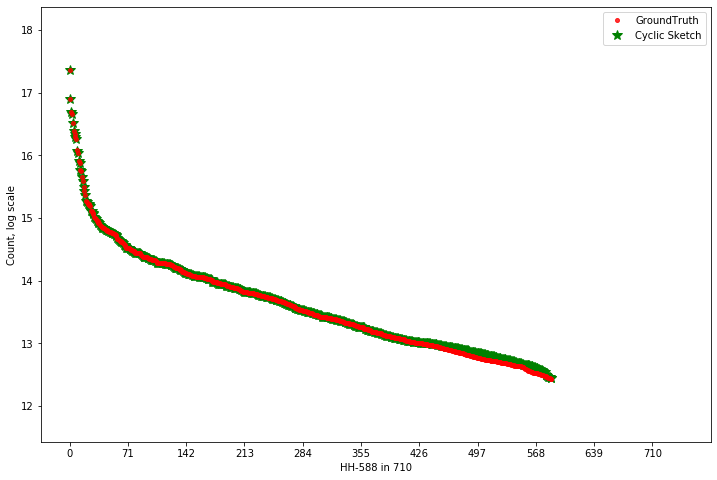

'\n# =============================result to csv=============================\nimport pandas as pd\npath="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n\n# HH to csv\nfilename=\'CS_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(HH.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n'

In [17]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re
from pympler import asizeof

dataset='caida'
total_count=0
heavy_ratio=1/5000
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=64
d=79
size=710
topk=710
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)   

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                total_count+=1
                e=str(e[:4])
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()
# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

'''
# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

# HH to csv
filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)
'''


# add d only

EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Execution time: 268.044 seconds.
Top-710,Sketch:158*64
Top_dict with 107480 bytes.
Sketch with 40576 bytes.
Sk_head with 43520 bytes.
hyperloglog with 4816 bytes.
Total size 191.7890625 kbytes, 

For copy:
Execution time: 268.044 seconds.
Top-710,Sketch:158*64
Top_dict with 107480 bytes.
Sketch with 40576 bytes.
Sk_head with 43520 bytes.
hyperloglog with 4816 bytes.
Total size 191.7890625 kbytes, 
Find 0.861 of Heavy Hitters
Find:611
Top_ARE: 0.0210
Top_AAE: 184.7643
Estimate time:  0.366 seconds.


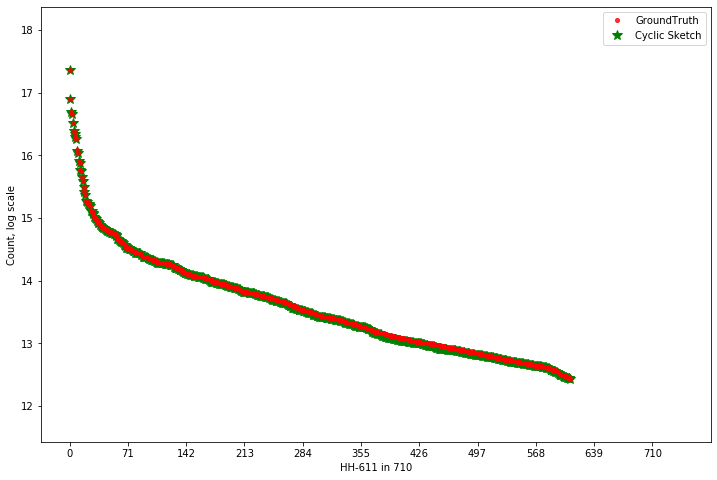

'\n# =============================result to csv=============================\nimport pandas as pd\npath="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n\n# HH to csv\nfilename=\'CS_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(HH.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n'

In [25]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re
from pympler import asizeof

dataset='caida'
total_count=0
heavy_ratio=1/5000
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=64
d=79*2
size=710
topk=710
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)   

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                total_count+=1
                e=str(e[:4])
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()
# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

'''
# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

# HH to csv
filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)
'''


EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Execution time: 260.702 seconds.
Top-710,Sketch:237*64
Top_dict with 107480 bytes.
Sketch with 60800 bytes.
Sk_head with 65384 bytes.
hyperloglog with 4816 bytes.
Total size 232.890625 kbytes, 

For copy:
Execution time: 260.702 seconds.
Top-710,Sketch:237*64
Top_dict with 107480 bytes.
Sketch with 60800 bytes.
Sk_head with 65384 bytes.
hyperloglog with 4816 bytes.
Total size 232.890625 kbytes, 
Find 0.880 of Heavy Hitters
Find:625
Top_ARE: 0.0182
Top_AAE: 153.9936
Estimate time:  0.385 seconds.


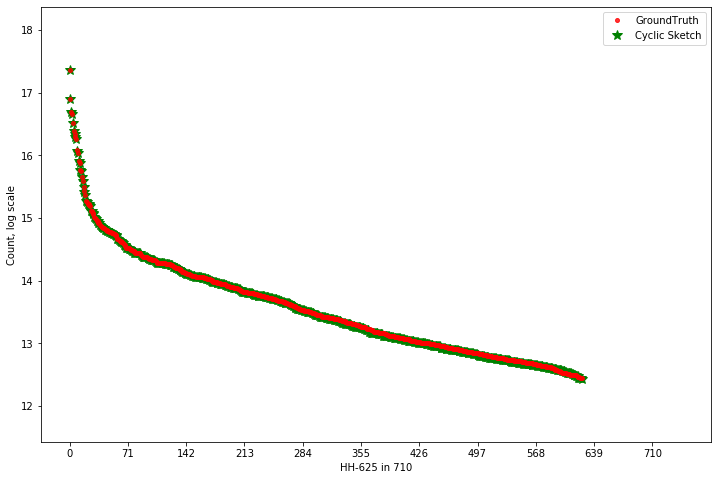

'\n# =============================result to csv=============================\nimport pandas as pd\npath="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n\n# HH to csv\nfilename=\'CS_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(HH.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n'

In [26]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re
from pympler import asizeof

dataset='caida'
total_count=0
heavy_ratio=1/5000
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=64
d=79*3
size=710
topk=710
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)   

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                total_count+=1
                e=str(e[:4])
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()
# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

'''
# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

# HH to csv
filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)
'''


EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Execution time: 285.901 seconds.
Top-710,Sketch:316*64
Top_dict with 107448 bytes.
Sketch with 81024 bytes.
Sk_head with 87000 bytes.
hyperloglog with 4816 bytes.
Total size 273.71875 kbytes, 

For copy:
Execution time: 285.901 seconds.
Top-710,Sketch:316*64
Top_dict with 107448 bytes.
Sketch with 81024 bytes.
Sk_head with 87000 bytes.
hyperloglog with 4816 bytes.
Total size 273.71875 kbytes, 
Find 0.893 of Heavy Hitters
Find:634
Top_ARE: 0.0172
Top_AAE: 149.3249
Estimate time:  0.435 seconds.


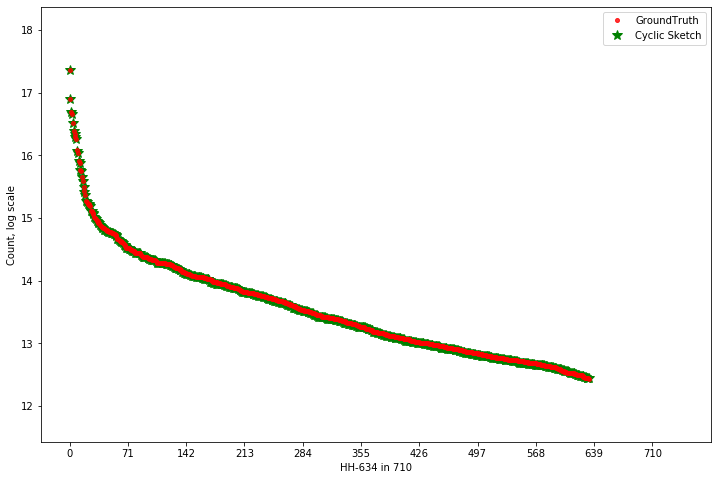

'\n# =============================result to csv=============================\nimport pandas as pd\npath="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n\n# HH to csv\nfilename=\'CS_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(HH.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n'

In [27]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re
from pympler import asizeof

dataset='caida'
total_count=0
heavy_ratio=1/5000
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=64
d=79*4
size=710
topk=710
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)   

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                total_count+=1
                e=str(e[:4])
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()
# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

'''
# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

# HH to csv
filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)
'''


EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Execution time: 274.767 seconds.
Top-710,Sketch:395*64
Top_dict with 107464 bytes.
Sketch with 101248 bytes.
Sk_head with 108440 bytes.
hyperloglog with 4816 bytes.
Total size 314.421875 kbytes, 

For copy:
Execution time: 274.767 seconds.
Top-710,Sketch:395*64
Top_dict with 107464 bytes.
Sketch with 101248 bytes.
Sk_head with 108440 bytes.
hyperloglog with 4816 bytes.
Total size 314.421875 kbytes, 
Find 0.910 of Heavy Hitters
Find:646
Top_ARE: 0.0159
Top_AAE: 140.7554
Estimate time:  0.387 seconds.


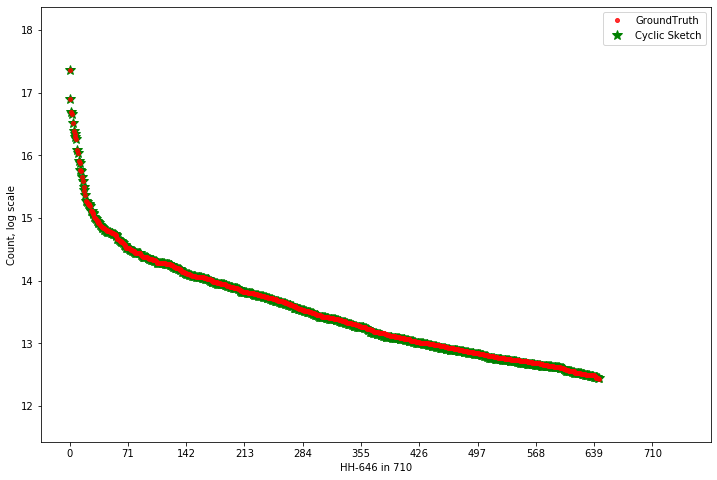

'\n# =============================result to csv=============================\nimport pandas as pd\npath="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n\n# HH to csv\nfilename=\'CS_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(HH.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n'

In [28]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re
from pympler import asizeof

dataset='caida'
total_count=0
heavy_ratio=1/5000
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=64
d=79*5
size=710
topk=710
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)   

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                total_count+=1
                e=str(e[:4])
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()
# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

'''
# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

# HH to csv
filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)
'''


EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Execution time: 282.379 seconds.
Top-710,Sketch:474*64
Top_dict with 107512 bytes.
Sketch with 121472 bytes.
Sk_head with 130760 bytes.
hyperloglog with 4816 bytes.
Total size 356.015625 kbytes, 

For copy:
Execution time: 282.379 seconds.
Top-710,Sketch:474*64
Top_dict with 107512 bytes.
Sketch with 121472 bytes.
Sk_head with 130760 bytes.
hyperloglog with 4816 bytes.
Total size 356.015625 kbytes, 
Find 0.915 of Heavy Hitters
Find:650
Top_ARE: 0.0152
Top_AAE: 135.0662
Estimate time:  0.468 seconds.


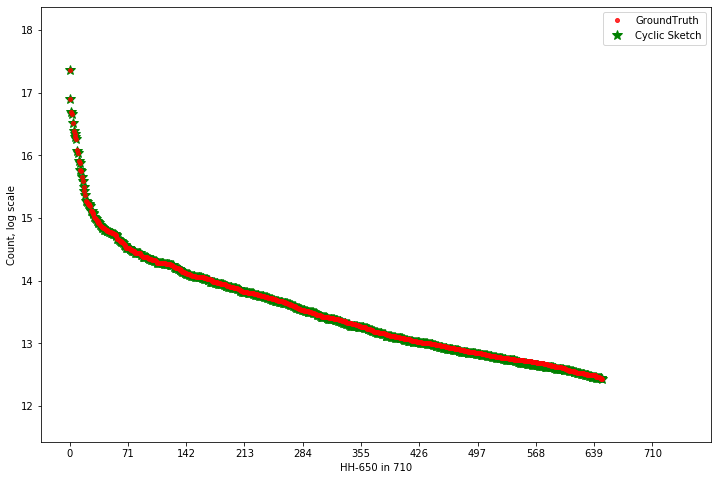

'\n# =============================result to csv=============================\nimport pandas as pd\npath="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n\n# HH to csv\nfilename=\'CS_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(HH.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n'

In [29]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re
from pympler import asizeof

dataset='caida'
total_count=0
heavy_ratio=1/5000
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=64
d=79*6
size=710
topk=710
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)   

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                total_count+=1
                e=str(e[:4])
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()
# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

'''
# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

# HH to csv
filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)
'''


EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Execution time: 310.234 seconds.
Top-710,Sketch:553*64
Top_dict with 107528 bytes.
Sketch with 141696 bytes.
Sk_head with 152144 bytes.
hyperloglog with 4816 bytes.
Total size 396.6640625 kbytes, 

For copy:
Execution time: 310.234 seconds.
Top-710,Sketch:553*64
Top_dict with 107528 bytes.
Sketch with 141696 bytes.
Sk_head with 152144 bytes.
hyperloglog with 4816 bytes.
Total size 396.6640625 kbytes, 
Find 0.914 of Heavy Hitters
Find:649
Top_ARE: 0.0151
Top_AAE: 134.2126
Estimate time:  0.391 seconds.


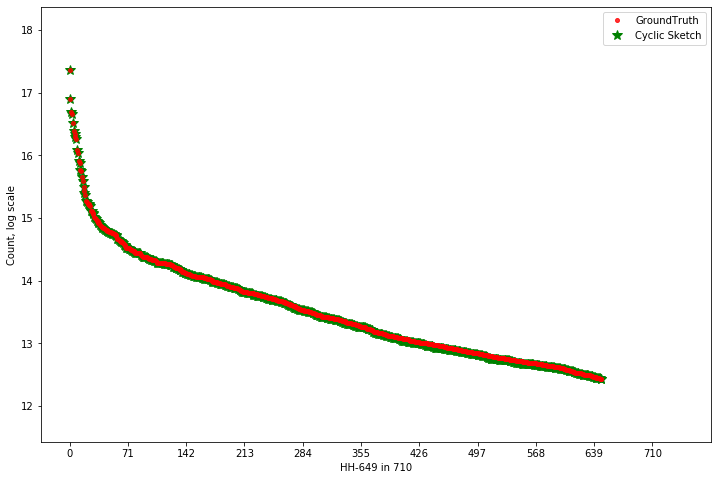

'\n# =============================result to csv=============================\nimport pandas as pd\npath="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n\n# HH to csv\nfilename=\'CS_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(HH.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n'

In [30]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re
from pympler import asizeof

dataset='caida'
total_count=0
heavy_ratio=1/5000
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=64
d=79*7
size=710
topk=710
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)   

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                total_count+=1
                e=str(e[:4])
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()
# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

'''
# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

# HH to csv
filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)
'''


EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Execution time: 300.468 seconds.
Top-710,Sketch:632*64
Top_dict with 107464 bytes.
Sketch with 161920 bytes.
Sk_head with 173824 bytes.
hyperloglog with 4816 bytes.
Total size 437.5234375 kbytes, 

For copy:
Execution time: 300.468 seconds.
Top-710,Sketch:632*64
Top_dict with 107464 bytes.
Sketch with 161920 bytes.
Sk_head with 173824 bytes.
hyperloglog with 4816 bytes.
Total size 437.5234375 kbytes, 
Find 0.913 of Heavy Hitters
Find:648
Top_ARE: 0.0148
Top_AAE: 131.0077
Estimate time:  0.626 seconds.


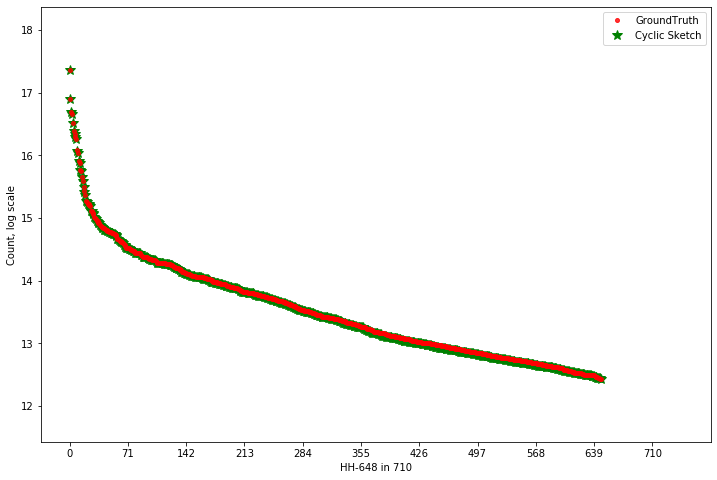

'\n# =============================result to csv=============================\nimport pandas as pd\npath="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n\n# HH to csv\nfilename=\'CS_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(HH.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n'

In [31]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re
from pympler import asizeof

dataset='caida'
total_count=0
heavy_ratio=1/5000
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=64
d=79*8
size=710
topk=710
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)   

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                total_count+=1
                e=str(e[:4])
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()
# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

'''
# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

# HH to csv
filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)
'''


EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Execution time: 260.527 seconds.
Top-710,Sketch:1106*64
Top_dict with 107520 bytes.
Sketch with 283264 bytes.
Sk_head with 302752 bytes.
hyperloglog with 4816 bytes.
Total size 681.984375 kbytes, 

For copy:
Execution time: 260.527 seconds.
Top-710,Sketch:1106*64
Top_dict with 107520 bytes.
Sketch with 283264 bytes.
Sk_head with 302752 bytes.
hyperloglog with 4816 bytes.
Total size 681.984375 kbytes, 
Find 0.923 of Heavy Hitters
Find:655
Top_ARE: 0.0137
Top_AAE: 124.4534
Estimate time:  0.397 seconds.


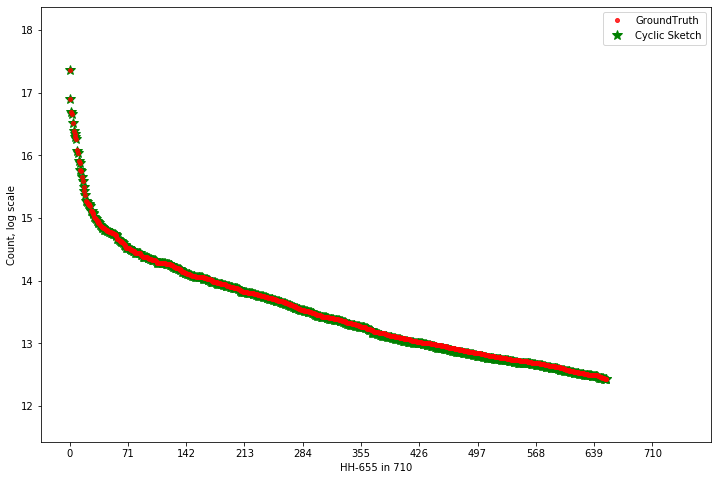

'\n# =============================result to csv=============================\nimport pandas as pd\npath="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n\n# HH to csv\nfilename=\'CS_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(HH.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n'

In [32]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re
from pympler import asizeof

dataset='caida'
total_count=0
heavy_ratio=1/5000
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=64
d=79*14
size=710
topk=710
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)   

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                total_count+=1
                e=str(e[:4])
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()
# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

'''
# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

# HH to csv
filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)
'''


EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Execution time: 267.073 seconds.
Top-710,Sketch:2212*64
Top_dict with 107512 bytes.
Sketch with 566400 bytes.
Sk_head with 602696 bytes.
hyperloglog with 4816 bytes.
Total size 1251.390625 kbytes, 

For copy:
Execution time: 267.073 seconds.
Top-710,Sketch:2212*64
Top_dict with 107512 bytes.
Sketch with 566400 bytes.
Sk_head with 602696 bytes.
hyperloglog with 4816 bytes.
Total size 1251.390625 kbytes, 
Find 0.949 of Heavy Hitters
Find:674
Top_ARE: 0.0104
Top_AAE: 92.0326
Estimate time:  0.385 seconds.


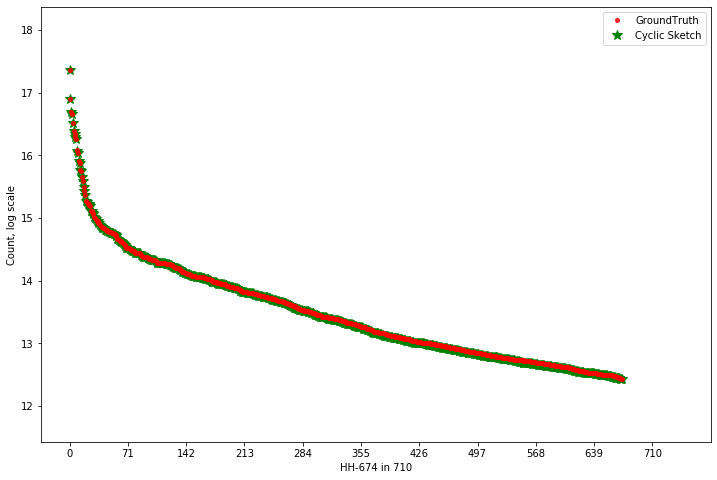

'\n# =============================result to csv=============================\nimport pandas as pd\npath="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n\n# HH to csv\nfilename=\'CS_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(HH.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n'

In [33]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re
from pympler import asizeof

dataset='caida'
total_count=0
heavy_ratio=1/5000
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=64
d=79*28
size=710
topk=710
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)   

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                total_count+=1
                e=str(e[:4])
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()
# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

'''
# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

# HH to csv
filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)
'''


EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Execution time: 258.154 seconds.
Top-710,Sketch:750*64
Top_dict with 107488 bytes.
Sketch with 192128 bytes.
Sk_head with 206104 bytes.
hyperloglog with 4816 bytes.
Total size 498.5703125 kbytes, 

For copy:
Execution time: 258.154 seconds.
Top-710,Sketch:750*64
Top_dict with 107488 bytes.
Sketch with 192128 bytes.
Sk_head with 206104 bytes.
hyperloglog with 4816 bytes.
Total size 498.5703125 kbytes, 
Find 0.927 of Heavy Hitters
Find:658
Top_ARE: 0.0146
Top_AAE: 125.1109
Estimate time:  0.382 seconds.


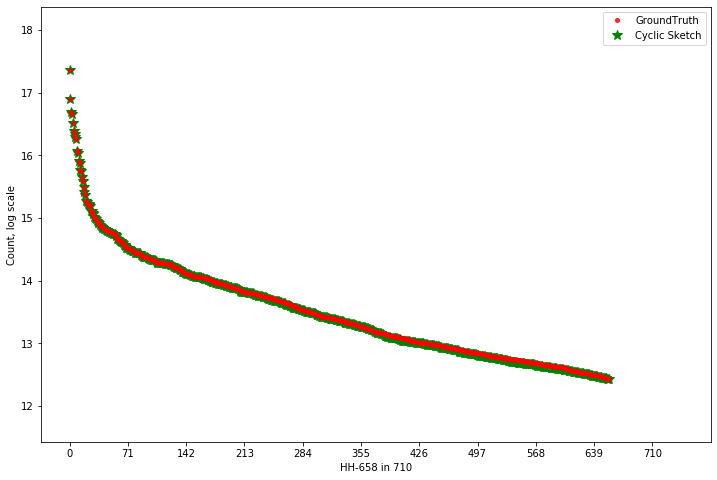

'\n# =============================result to csv=============================\nimport pandas as pd\npath="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n\n# HH to csv\nfilename=\'CS_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(HH.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n'

In [46]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re
from pympler import asizeof

dataset='caida'
total_count=0
heavy_ratio=1/5000
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=64
d=750
size=710
topk=710
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)   

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                total_count+=1
                e=str(e[:4])
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()
# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

'''
# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

# HH to csv
filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)
'''


EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Execution time: 275.767 seconds.
Top-710,Sketch:350*64
Top_dict with 107496 bytes.
Sketch with 89728 bytes.
Sk_head with 96160 bytes.
hyperloglog with 4816 bytes.
Total size 291.2109375 kbytes, 

For copy:
Execution time: 275.767 seconds.
Top-710,Sketch:350*64
Top_dict with 107496 bytes.
Sketch with 89728 bytes.
Sk_head with 96160 bytes.
hyperloglog with 4816 bytes.
Total size 291.2109375 kbytes, 
Find 0.899 of Heavy Hitters
Find:638
Top_ARE: 0.0160
Top_AAE: 143.4498
Estimate time:  0.390 seconds.


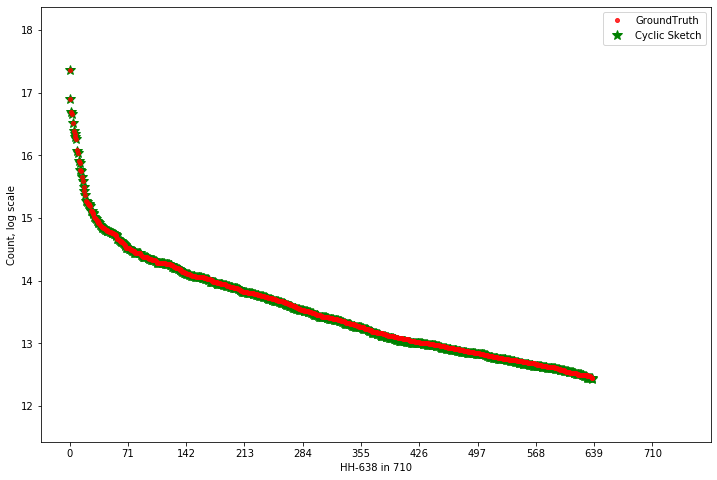

'\n# =============================result to csv=============================\nimport pandas as pd\npath="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n\n# HH to csv\nfilename=\'CS_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(HH.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n'

In [47]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re
from pympler import asizeof

dataset='caida'
total_count=0
heavy_ratio=1/5000
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=64
d=350
size=710
topk=710
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)   

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                total_count+=1
                e=str(e[:4])
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()
# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

'''
# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

# HH to csv
filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)
'''


EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Execution time: 258.488 seconds.
Top-710,Sketch:950*64
Top_dict with 107496 bytes.
Sketch with 243328 bytes.
Sk_head with 260264 bytes.
hyperloglog with 4816 bytes.
Total size 601.46875 kbytes, 

For copy:
Execution time: 258.488 seconds.
Top-710,Sketch:950*64
Top_dict with 107496 bytes.
Sketch with 243328 bytes.
Sk_head with 260264 bytes.
hyperloglog with 4816 bytes.
Total size 601.46875 kbytes, 
Find 0.921 of Heavy Hitters
Find:654
Top_ARE: 0.0130
Top_AAE: 118.0092
Estimate time:  0.393 seconds.


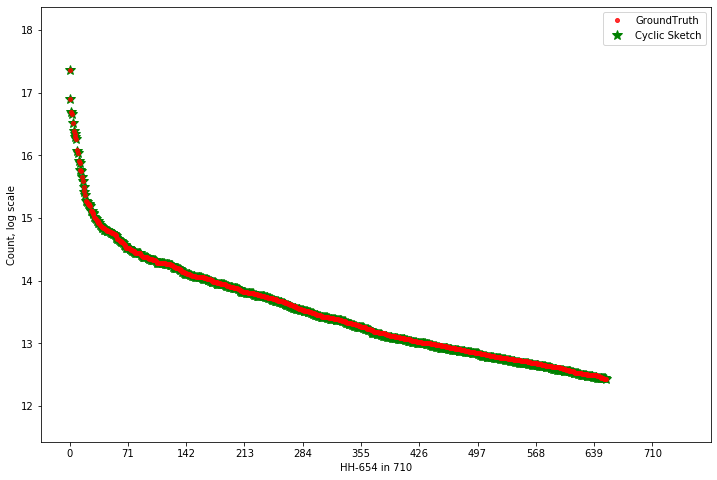

'\n# =============================result to csv=============================\nimport pandas as pd\npath="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n\n# HH to csv\nfilename=\'CS_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(HH.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n'

In [48]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re
from pympler import asizeof

dataset='caida'
total_count=0
heavy_ratio=1/5000
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=64
d=950
size=710
topk=710
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)   

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                total_count+=1
                e=str(e[:4])
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()
# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

'''
# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

# HH to csv
filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)
'''


EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Execution time: 271.009 seconds.
Top-710,Sketch:1145*64
Top_dict with 107408 bytes.
Sketch with 293248 bytes.
Sk_head with 314224 bytes.
hyperloglog with 4816 bytes.
Total size 702.828125 kbytes, 

For copy:
Execution time: 271.009 seconds.
Top-710,Sketch:1145*64
Top_dict with 107408 bytes.
Sketch with 293248 bytes.
Sk_head with 314224 bytes.
hyperloglog with 4816 bytes.
Total size 702.828125 kbytes, 
Find 0.928 of Heavy Hitters
Find:659
Top_ARE: 0.0130
Top_AAE: 115.0986
Estimate time:  0.378 seconds.


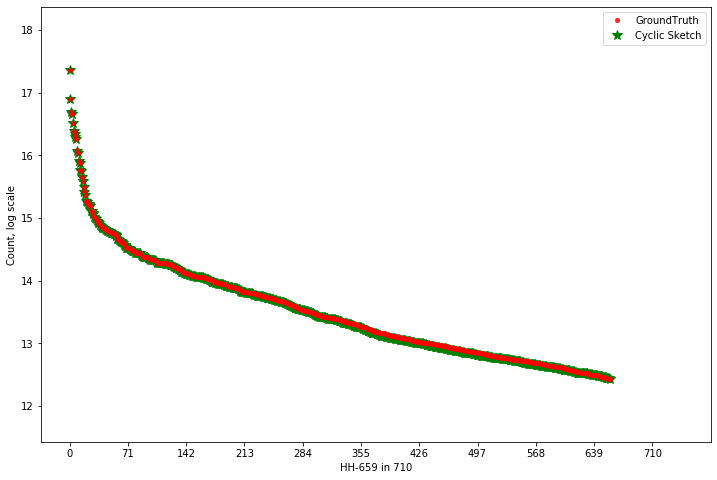

'\n# =============================result to csv=============================\nimport pandas as pd\npath="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n\n# HH to csv\nfilename=\'CS_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(HH.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n'

In [53]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re
from pympler import asizeof

dataset='caida'
total_count=0
heavy_ratio=1/5000
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=64
d=1145
size=710
topk=710
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)   

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                total_count+=1
                e=str(e[:4])
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()
# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

'''
# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

# HH to csv
filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)
'''


EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Execution time: 305.094 seconds.
Top-710,Sketch:1340*64
Top_dict with 107520 bytes.
Sketch with 343168 bytes.
Sk_head with 367232 bytes.
hyperloglog with 4816 bytes.
Total size 803.453125 kbytes, 

For copy:
Execution time: 305.094 seconds.
Top-710,Sketch:1340*64
Top_dict with 107520 bytes.
Sketch with 343168 bytes.
Sk_head with 367232 bytes.
hyperloglog with 4816 bytes.
Total size 803.453125 kbytes, 
Find 0.932 of Heavy Hitters
Find:662
Top_ARE: 0.0120
Top_AAE: 101.6148
Estimate time:  0.408 seconds.


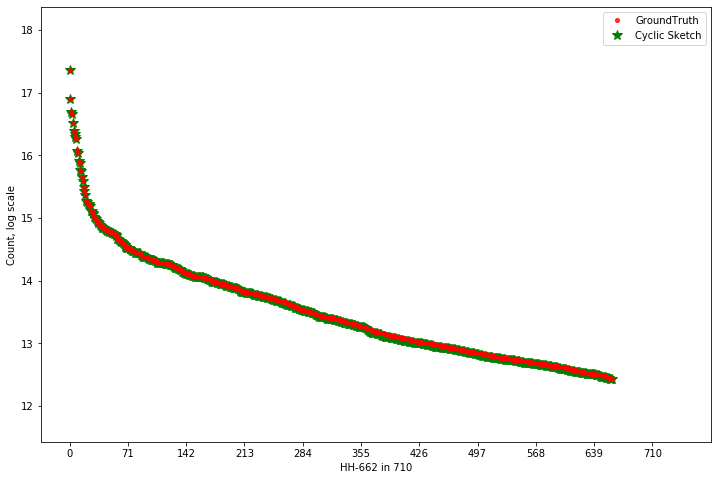

'\n# =============================result to csv=============================\nimport pandas as pd\npath="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n\n# HH to csv\nfilename=\'CS_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(HH.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n'

In [54]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re
from pympler import asizeof

dataset='caida'
total_count=0
heavy_ratio=1/5000
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=64
d=1340
size=710
topk=710
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)   

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                total_count+=1
                e=str(e[:4])
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()
# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

'''
# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

# HH to csv
filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)
'''


EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Execution time: 295.441 seconds.
Top-710,Sketch:1540*64
Top_dict with 107488 bytes.
Sketch with 394368 bytes.
Sk_head with 421648 bytes.
hyperloglog with 4816 bytes.
Total size 906.5625 kbytes, 

For copy:
Execution time: 295.441 seconds.
Top-710,Sketch:1540*64
Top_dict with 107488 bytes.
Sketch with 394368 bytes.
Sk_head with 421648 bytes.
hyperloglog with 4816 bytes.
Total size 906.5625 kbytes, 
Find 0.934 of Heavy Hitters
Find:663
Top_ARE: 0.0105
Top_AAE: 95.9970
Estimate time:  0.541 seconds.


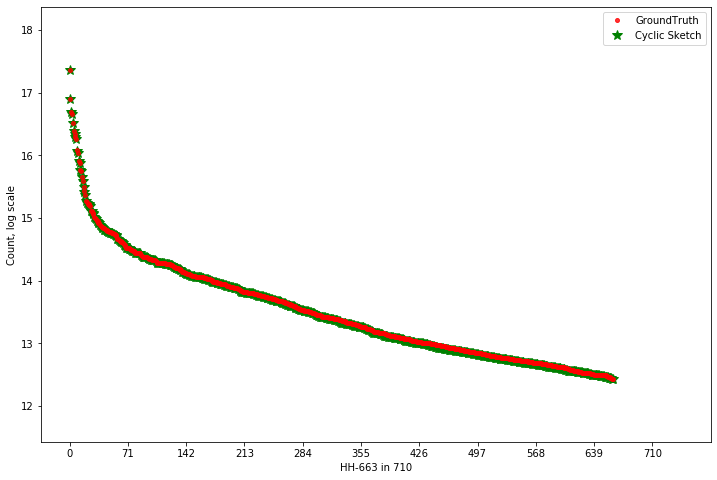

'\n# =============================result to csv=============================\nimport pandas as pd\npath="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n\n# HH to csv\nfilename=\'CS_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(HH.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n'

In [55]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re
from pympler import asizeof

dataset='caida'
total_count=0
heavy_ratio=1/5000
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=64
d=1540
size=710
topk=710
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)   

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                total_count+=1
                e=str(e[:4])
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()
# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

'''
# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

# HH to csv
filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)
'''


EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Execution time: 271.325 seconds.
Top-710,Sketch:1735*64
Top_dict with 107520 bytes.
Sketch with 444288 bytes.
Sk_head with 474472 bytes.
hyperloglog with 4816 bytes.
Total size 1006.9296875 kbytes, 

For copy:
Execution time: 271.325 seconds.
Top-710,Sketch:1735*64
Top_dict with 107520 bytes.
Sketch with 444288 bytes.
Sk_head with 474472 bytes.
hyperloglog with 4816 bytes.
Total size 1006.9296875 kbytes, 
Find 0.951 of Heavy Hitters
Find:675
Top_ARE: 0.0087
Top_AAE: 80.4400
Estimate time:  0.387 seconds.


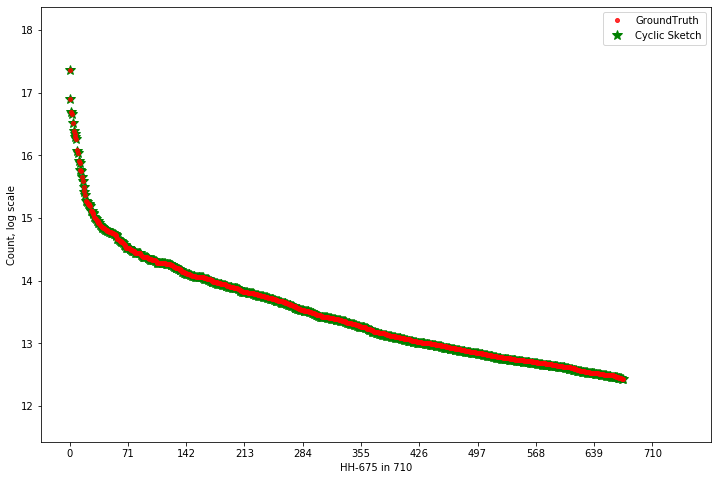

'\n# =============================result to csv=============================\nimport pandas as pd\npath="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n\n# HH to csv\nfilename=\'CS_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(HH.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n'

In [56]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re
from pympler import asizeof

dataset='caida'
total_count=0
heavy_ratio=1/5000
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=64
d=1735
size=710
topk=710
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)   

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                total_count+=1
                e=str(e[:4])
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()
# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

'''
# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

# HH to csv
filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)
'''


EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Execution time: 266.327 seconds.
Top-710,Sketch:830*64
Top_dict with 107432 bytes.
Sketch with 212608 bytes.
Sk_head with 228216 bytes.
hyperloglog with 4816 bytes.
Total size 540.109375 kbytes, 

For copy:
Execution time: 266.327 seconds.
Top-710,Sketch:830*64
Top_dict with 107432 bytes.
Sketch with 212608 bytes.
Sk_head with 228216 bytes.
hyperloglog with 4816 bytes.
Total size 540.109375 kbytes, 
Find 0.920 of Heavy Hitters
Find:653
Top_ARE: 0.0148
Top_AAE: 128.6172
Estimate time:  0.375 seconds.


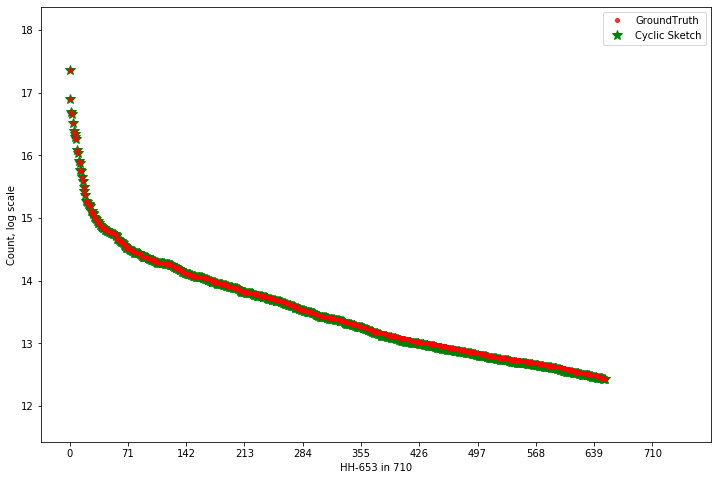

'\n# =============================result to csv=============================\nimport pandas as pd\npath="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n\n# HH to csv\nfilename=\'CS_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(HH.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n'

In [35]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re
from pympler import asizeof

dataset='caida'
total_count=0
heavy_ratio=1/5000
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=64
d=830
size=710
topk=710
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)   

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                total_count+=1
                e=str(e[:4])
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()
# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

'''
# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

# HH to csv
filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)
'''


# add both d and w

EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Execution time: 351.539 seconds.
Top-710,Sketch:237*192
Top_dict with 107456 bytes.
Sketch with 182144 bytes.
Sk_head with 65688 bytes.
hyperloglog with 4816 bytes.
Total size 351.6640625 kbytes, 

For copy:
Execution time: 351.539 seconds.
Top-710,Sketch:237*192
Top_dict with 107456 bytes.
Sketch with 182144 bytes.
Sk_head with 65688 bytes.
hyperloglog with 4816 bytes.
Total size 351.6640625 kbytes, 
Find 0.907 of Heavy Hitters
Find:644
Top_ARE: 0.0189
Top_AAE: 166.7360
Estimate time:  0.386 seconds.


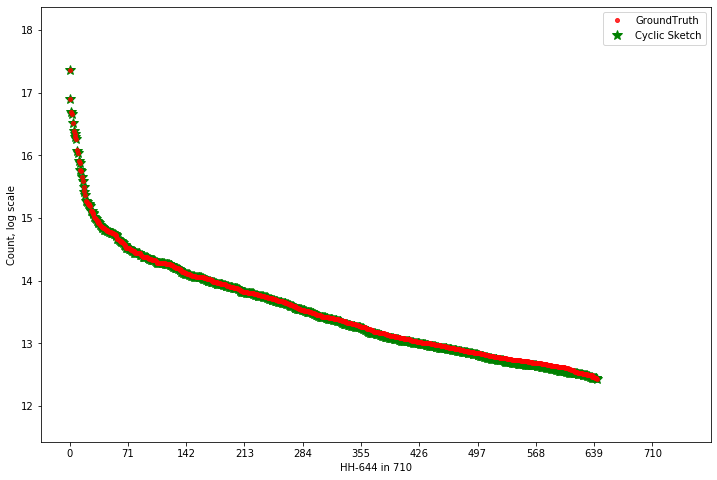

'\n# =============================result to csv=============================\nimport pandas as pd\npath="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n\n# HH to csv\nfilename=\'CS_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(HH.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n'

In [21]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re
from pympler import asizeof

dataset='caida'
total_count=0
heavy_ratio=1/5000
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=64*3
d=79*3
size=710
topk=710
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)   

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                total_count+=1
                e=str(e[:4])
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()
# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

'''
# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

# HH to csv
filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)
'''


EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Execution time: 286.680 seconds.
Top-710,Sketch:316*256
Top_dict with 107456 bytes.
Sketch with 323712 bytes.
Sk_head with 87264 bytes.
hyperloglog with 4816 bytes.
Total size 510.984375 kbytes, 

For copy:
Execution time: 286.680 seconds.
Top-710,Sketch:316*256
Top_dict with 107456 bytes.
Sketch with 323712 bytes.
Sk_head with 87264 bytes.
hyperloglog with 4816 bytes.
Total size 510.984375 kbytes, 
Find 0.907 of Heavy Hitters
Find:644
Top_ARE: 0.0181
Top_AAE: 159.3960
Estimate time:  0.383 seconds.


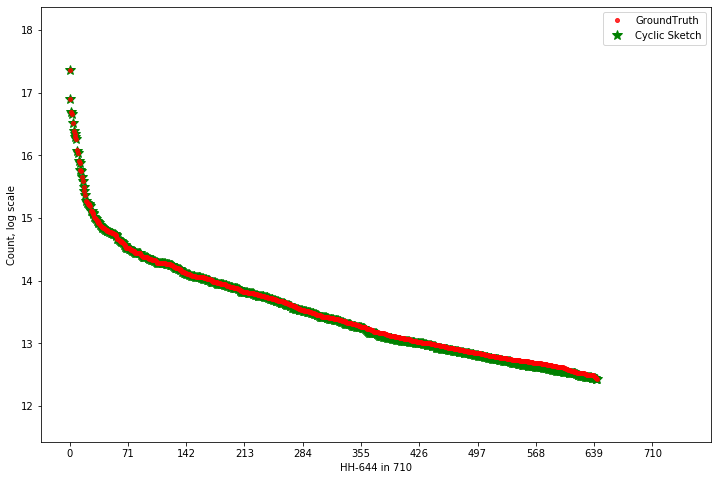

'\n# =============================result to csv=============================\nimport pandas as pd\npath="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n\n# HH to csv\nfilename=\'CS_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(HH.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n'

In [19]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re
from pympler import asizeof

dataset='caida'
total_count=0
heavy_ratio=1/5000
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=64*4
d=79*4
size=710
topk=710
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)   

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                total_count+=1
                e=str(e[:4])
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()
# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

'''
# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

# HH to csv
filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)
'''


EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Execution time: 291.366 seconds.
Top-710,Sketch:395*320
Top_dict with 107504 bytes.
Sketch with 505728 bytes.
Sk_head with 108880 bytes.
hyperloglog with 4816 bytes.
Total size 709.890625 kbytes, 

For copy:
Execution time: 291.366 seconds.
Top-710,Sketch:395*320
Top_dict with 107504 bytes.
Sketch with 505728 bytes.
Sk_head with 108880 bytes.
hyperloglog with 4816 bytes.
Total size 709.890625 kbytes, 
Find 0.907 of Heavy Hitters
Find:644
Top_ARE: 0.0163
Top_AAE: 151.7795
Estimate time:  0.389 seconds.


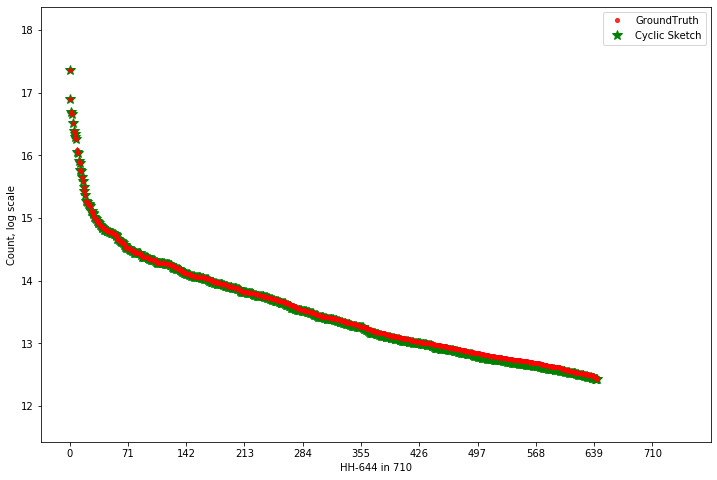

'\n# =============================result to csv=============================\nimport pandas as pd\npath="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n\n# HH to csv\nfilename=\'CS_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(HH.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n'

In [23]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re
from pympler import asizeof

dataset='caida'
total_count=0
heavy_ratio=1/5000
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=64*5
d=79*5
size=710
topk=710
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)   

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                total_count+=1
                e=str(e[:4])
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()
# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

'''
# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

# HH to csv
filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)
'''


EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Execution time: 311.270 seconds.
Top-710,Sketch:474*384
Top_dict with 107504 bytes.
Sketch with 728192 bytes.
Sk_head with 130856 bytes.
hyperloglog with 4816 bytes.
Total size 948.6015625 kbytes, 

For copy:
Execution time: 311.270 seconds.
Top-710,Sketch:474*384
Top_dict with 107504 bytes.
Sketch with 728192 bytes.
Sk_head with 130856 bytes.
hyperloglog with 4816 bytes.
Total size 948.6015625 kbytes, 
Find 0.906 of Heavy Hitters
Find:643
Top_ARE: 0.0170
Top_AAE: 158.7294
Estimate time:  0.371 seconds.


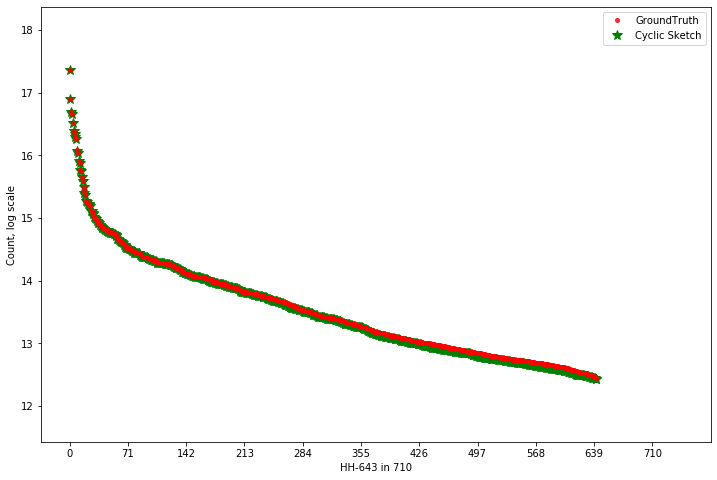

'\n# =============================result to csv=============================\nimport pandas as pd\npath="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n\n# HH to csv\nfilename=\'CS_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(HH.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n'

In [22]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re
from pympler import asizeof

dataset='caida'
total_count=0
heavy_ratio=1/5000
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=64*6
d=79*6
size=710
topk=710
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)   

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                total_count+=1
                e=str(e[:4])
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()
# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

'''
# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

# HH to csv
filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)
'''


EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Execution time: 285.486 seconds.
Top-710,Sketch:553*448
Top_dict with 107480 bytes.
Sketch with 991104 bytes.
Sk_head with 152560 bytes.
hyperloglog with 4816 bytes.
Total size 1226.5234375 kbytes, 

For copy:
Execution time: 285.486 seconds.
Top-710,Sketch:553*448
Top_dict with 107480 bytes.
Sketch with 991104 bytes.
Sk_head with 152560 bytes.
hyperloglog with 4816 bytes.
Total size 1226.5234375 kbytes, 
Find 0.923 of Heavy Hitters
Find:655
Top_ARE: 0.0162
Top_AAE: 146.9985
Estimate time:  0.366 seconds.


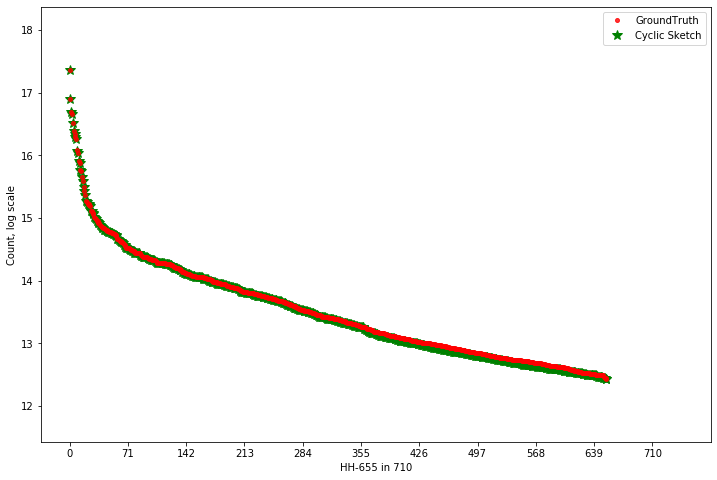

'\n# =============================result to csv=============================\nimport pandas as pd\npath="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n\n# HH to csv\nfilename=\'CS_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(HH.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n'

In [24]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re
from pympler import asizeof

dataset='caida'
total_count=0
heavy_ratio=1/5000
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=64*7
d=79*7
size=710
topk=710
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)   

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                total_count+=1
                e=str(e[:4])
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()
# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

'''
# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

# HH to csv
filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)
'''


EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Execution time: 267.802 seconds.
Top-710,Sketch:632*512
Top_dict with 107472 bytes.
Sketch with 1294464 bytes.
Sk_head with 174360 bytes.
hyperloglog with 4816 bytes.
Total size 1544.0546875 kbytes, 

For copy:
Execution time: 267.802 seconds.
Top-710,Sketch:632*512
Top_dict with 107472 bytes.
Sketch with 1294464 bytes.
Sk_head with 174360 bytes.
hyperloglog with 4816 bytes.
Total size 1544.0546875 kbytes, 
Find 0.924 of Heavy Hitters
Find:656
Top_ARE: 0.0154
Top_AAE: 143.3887
Estimate time:  0.364 seconds.


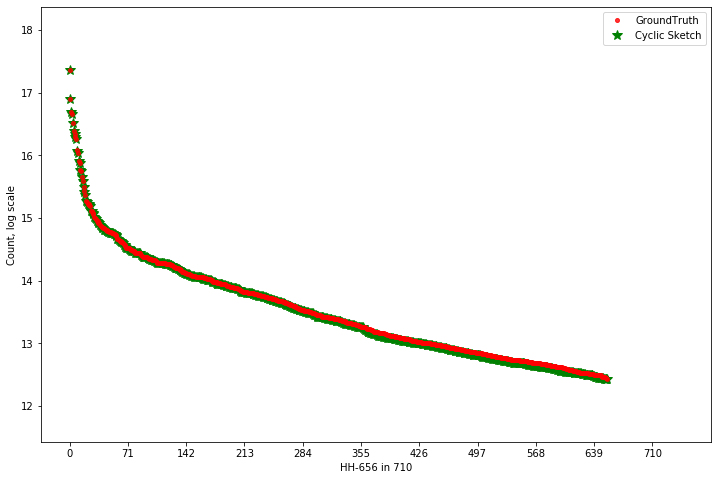

'\n# =============================result to csv=============================\nimport pandas as pd\npath="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n\n# HH to csv\nfilename=\'CS_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(HH.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n'

In [20]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re
from pympler import asizeof

dataset='caida'
total_count=0
heavy_ratio=1/5000
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=64*8
d=79*8
size=710
topk=710
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)   

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                total_count+=1
                e=str(e[:4])
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()
# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

'''
# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

# HH to csv
filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)
'''


# Add Top only

EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Execution time: 237.080 seconds.
Top-1500,Sketch:79*64
Top_dict with 222776 bytes.
Sketch with 20352 bytes.
Sk_head with 21232 bytes.
hyperloglog with 4816 bytes.
Total size 262.8671875 kbytes, 

For copy:
Execution time: 237.080 seconds.
Top-1500,Sketch:79*64
Top_dict with 222776 bytes.
Sketch with 20352 bytes.
Sk_head with 21232 bytes.
hyperloglog with 4816 bytes.
Total size 262.8671875 kbytes, 
Find 0.977 of Heavy Hitters
Find:694
Top_ARE: 0.0130
Top_AAE: 103.8588
Estimate time:  0.388 seconds.


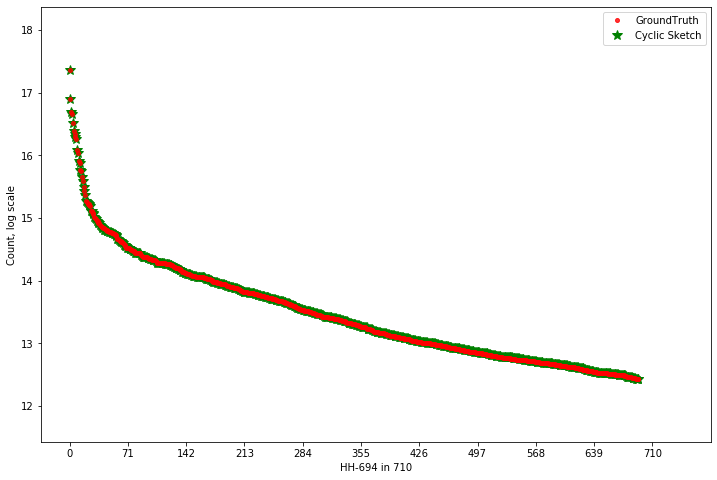

FileNotFoundError: [Errno 2] No such file or directory: '..\\result\\CS\\caida\\HH\\79_64\\CS_HH_710.csv'

In [12]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re
from pympler import asizeof

dataset='caida'
total_count=0
heavy_ratio=1/5000
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=64
d=79
size=1500
topk=1500
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)   

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                total_count+=1
                e=str(e[:4])
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()
# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

'''
# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

# HH to csv
filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)
'''

EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Execution time: 232.837 seconds.
Top-2000,Sketch:79*64
Top_dict with 272528 bytes.
Sketch with 20352 bytes.
Sk_head with 21096 bytes.
hyperloglog with 4816 bytes.
Total size 311.3203125 kbytes, 

For copy:
Execution time: 232.837 seconds.
Top-2000,Sketch:79*64
Top_dict with 272528 bytes.
Sketch with 20352 bytes.
Sk_head with 21096 bytes.
hyperloglog with 4816 bytes.
Total size 311.3203125 kbytes, 
Find 0.996 of Heavy Hitters
Find:707
Top_ARE: 0.0109
Top_AAE: 86.3465
Estimate time:  0.379 seconds.


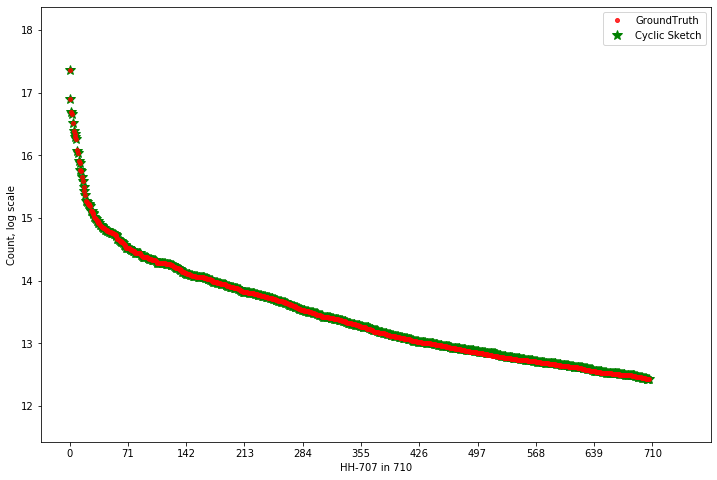

FileNotFoundError: [Errno 2] No such file or directory: '..\\result\\CS\\caida\\HH\\79_64\\CS_HH_710.csv'

In [9]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re
from pympler import asizeof

dataset='caida'
total_count=0
heavy_ratio=1/5000
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=64
d=79
size=2000
topk=2000
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)   

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                total_count+=1
                e=str(e[:4])
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()
# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

# HH to csv
filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Execution time: 221.429 seconds.
Top-2500,Sketch:79*64
Top_dict with 322192 bytes.
Sketch with 20352 bytes.
Sk_head with 20720 bytes.
hyperloglog with 4848 bytes.
Total size 359.484375 kbytes, 

For copy:
Execution time: 221.429 seconds.
Top-2500,Sketch:79*64
Top_dict with 322192 bytes.
Sketch with 20352 bytes.
Sk_head with 20720 bytes.
hyperloglog with 4848 bytes.
Total size 359.484375 kbytes, 
Find 0.997 of Heavy Hitters
Find:708
Top_ARE: 0.0097
Top_AAE: 77.5311
Estimate time:  0.390 seconds.


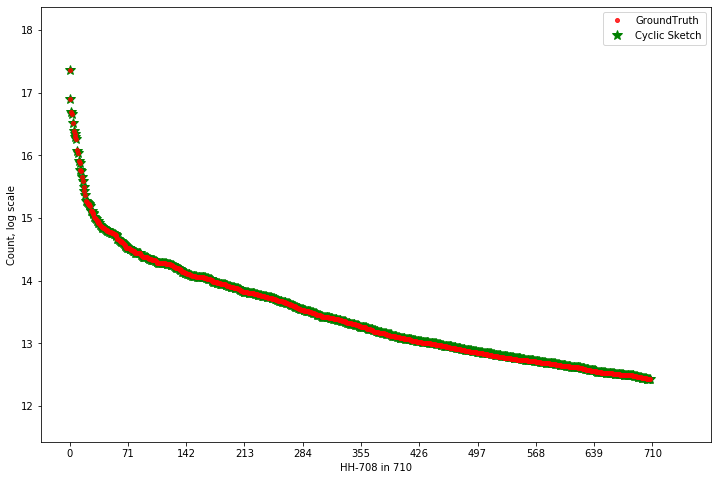

FileNotFoundError: [Errno 2] No such file or directory: '..\\result\\CS\\caida\\HH\\79_64\\CS_HH_710.csv'

In [13]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re
from pympler import asizeof

dataset='caida'
total_count=0
heavy_ratio=1/5000
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=64
d=79
size=2500
topk=2500
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)   

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                total_count+=1
                e=str(e[:4])
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()
# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

# HH to csv
filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Execution time: 201.322 seconds.
Top-4000,Sketch:79*64
Top_dict with 544992 bytes.
Sketch with 20352 bytes.
Sk_head with 20432 bytes.
hyperloglog with 4848 bytes.
Total size 576.78125 kbytes, 

For copy:
Execution time: 201.322 seconds.
Top-4000,Sketch:79*64
Top_dict with 544992 bytes.
Sketch with 20352 bytes.
Sk_head with 20432 bytes.
hyperloglog with 4848 bytes.
Total size 576.78125 kbytes, 
Find 0.994 of Heavy Hitters
Find:706
Top_ARE: 0.0062
Top_AAE: 50.2309
Estimate time:  0.363 seconds.


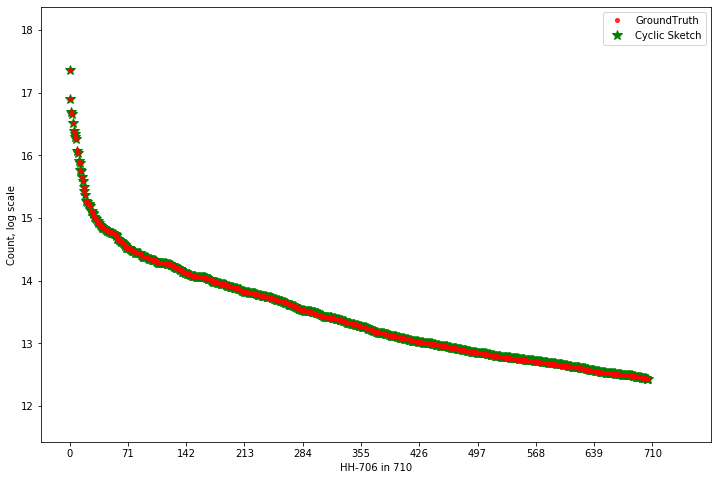

FileNotFoundError: [Errno 2] No such file or directory: '..\\result\\CS\\caida\\HH\\79_64\\CS_HH_710.csv'

In [7]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re
from pympler import asizeof

dataset='caida'
total_count=0
heavy_ratio=1/5000
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=64
d=79
size=4000
topk=4000
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)   

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                total_count+=1
                e=str(e[:4])
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()
# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

# HH to csv
filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Execution time: 208.567 seconds.
Top-3000,Sketch:79*64
Top_dict with 445384 bytes.
Sketch with 20352 bytes.
Sk_head with 20704 bytes.
hyperloglog with 4848 bytes.
Total size 479.7734375 kbytes, 

For copy:
Execution time: 208.567 seconds.
Top-3000,Sketch:79*64
Top_dict with 445384 bytes.
Sketch with 20352 bytes.
Sk_head with 20704 bytes.
hyperloglog with 4848 bytes.
Total size 479.7734375 kbytes, 
Find 0.986 of Heavy Hitters
Find:700
Top_ARE: 0.0067
Top_AAE: 54.5986
Estimate time:  0.379 seconds.


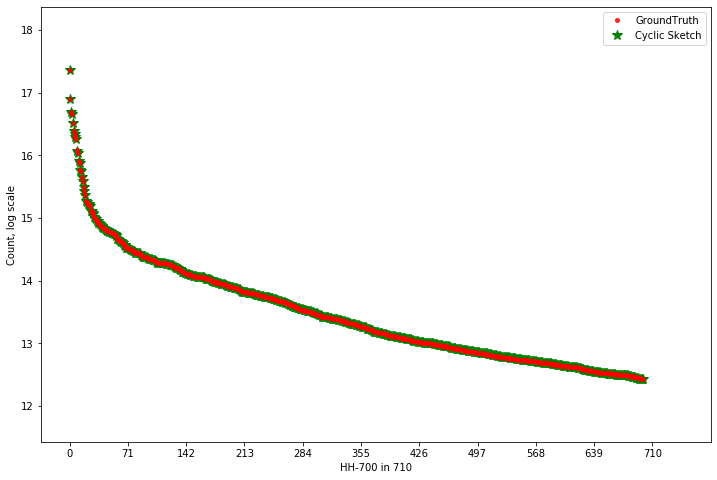

FileNotFoundError: [Errno 2] No such file or directory: '..\\result\\CS\\caida\\HH\\79_64\\CS_HH_710.csv'

In [10]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re
from pympler import asizeof

dataset='caida'
total_count=0
heavy_ratio=1/5000
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=64
d=79
size=3000
topk=3000
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)   

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                total_count+=1
                e=str(e[:4])
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()
# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

# HH to csv
filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Execution time: 224.359 seconds.
Top-3500,Sketch:79*64
Top_dict with 495208 bytes.
Sketch with 20352 bytes.
Sk_head with 20616 bytes.
hyperloglog with 4848 bytes.
Total size 528.34375 kbytes, 

For copy:
Execution time: 224.359 seconds.
Top-3500,Sketch:79*64
Top_dict with 495208 bytes.
Sketch with 20352 bytes.
Sk_head with 20616 bytes.
hyperloglog with 4848 bytes.
Total size 528.34375 kbytes, 
Find 0.993 of Heavy Hitters
Find:705
Top_ARE: 0.0061
Top_AAE: 49.9050
Estimate time:  0.378 seconds.


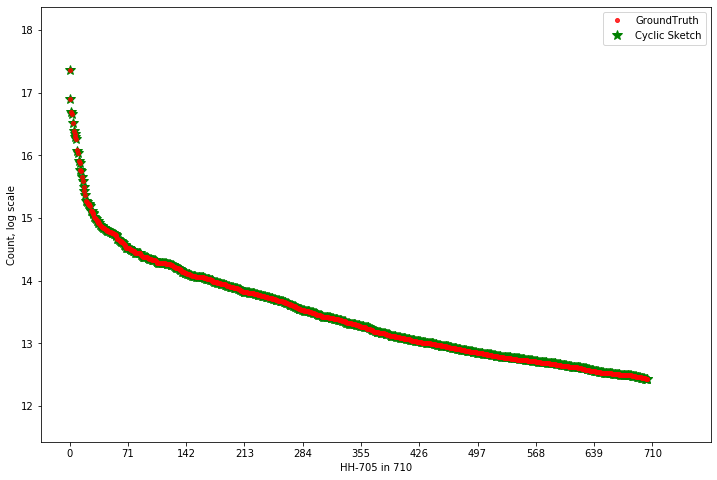

FileNotFoundError: [Errno 2] No such file or directory: '..\\result\\CS\\caida\\HH\\79_64\\CS_HH_710.csv'

In [14]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re
from pympler import asizeof

dataset='caida'
total_count=0
heavy_ratio=1/5000
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=64
d=79
size=3500
topk=3500
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)   

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                total_count+=1
                e=str(e[:4])
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()
# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

# HH to csv
filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Execution time: 199.705 seconds.
Top-4500,Sketch:79*64
Top_dict with 594416 bytes.
Sketch with 20352 bytes.
Sk_head with 20280 bytes.
hyperloglog with 4848 bytes.
Total size 624.8984375 kbytes, 

For copy:
Execution time: 199.705 seconds.
Top-4500,Sketch:79*64
Top_dict with 594416 bytes.
Sketch with 20352 bytes.
Sk_head with 20280 bytes.
hyperloglog with 4848 bytes.
Total size 624.8984375 kbytes, 
Find 0.997 of Heavy Hitters
Find:708
Top_ARE: 0.0056
Top_AAE: 45.1992
Estimate time:  0.366 seconds.


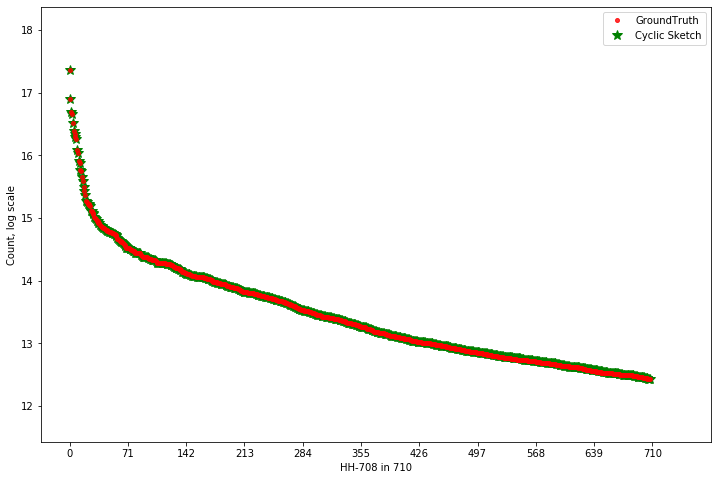

FileNotFoundError: [Errno 2] No such file or directory: '..\\result\\CS\\caida\\HH\\79_64\\CS_HH_710.csv'

In [15]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re
from pympler import asizeof

dataset='caida'
total_count=0
heavy_ratio=1/5000
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=64
d=79
size=4500
topk=4500
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)   

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                total_count+=1
                e=str(e[:4])
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()
# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

# HH to csv
filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Execution time: 201.664 seconds.
Top-5000,Sketch:79*64
Top_dict with 644672 bytes.
Sketch with 20352 bytes.
Sk_head with 20248 bytes.
hyperloglog with 4848 bytes.
Total size 673.9453125 kbytes, 

For copy:
Execution time: 201.664 seconds.
Top-5000,Sketch:79*64
Top_dict with 644672 bytes.
Sketch with 20352 bytes.
Sk_head with 20248 bytes.
hyperloglog with 4848 bytes.
Total size 673.9453125 kbytes, 
Find 0.996 of Heavy Hitters
Find:707
Top_ARE: 0.0040
Top_AAE: 32.6209
Estimate time:  0.381 seconds.


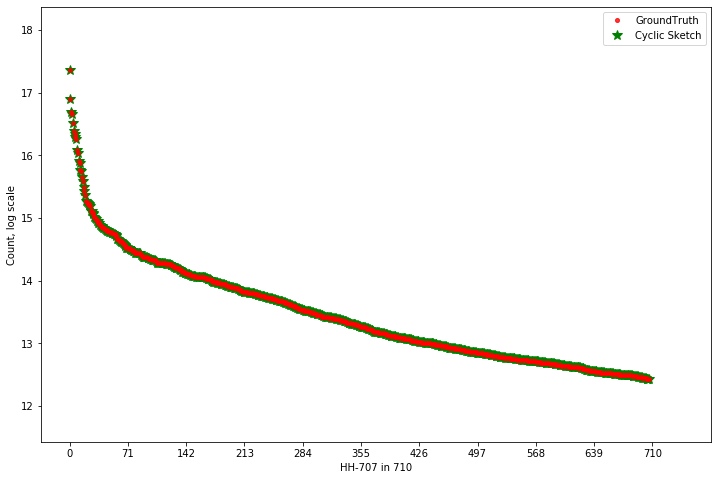

FileNotFoundError: [Errno 2] No such file or directory: '..\\result\\CS\\caida\\HH\\79_64\\CS_HH_710.csv'

In [8]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re
from pympler import asizeof

dataset='caida'
total_count=0
heavy_ratio=1/5000
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=64
d=79
size=5000
topk=5000
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)   

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                total_count+=1
                e=str(e[:4])
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()
# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

# HH to csv
filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)